In [37]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
ds = load_dataset("Nooha/cc_fraud_detection_dataset")
train_df = pd.DataFrame(ds['train'])
train_df

,ssn,cc_num,first,last,gender,city,state,zip,city_pop,job,dob,acct_num,trans_num,trans_date,trans_time,unix_time,category,amt,is_fraud,merchant
0,367-85-9826,4361337605230458,Kristie,Davis,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,c036244703adb9d5392f4027d9d4b38d,2021-07-31,02:30:01,1627678801,grocery_pos,337.54,1,fraud_Kovacek
1,367-85-9826,4361337605230458,Kristie,Davis,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,42f000b0b3b0ef534e5b8ef9ec1db13a,2021-08-01,22:37:41,1627837661,personal_care,21.13,1,fraud_Bradtke
2,367-85-9826,4361337605230458,Kristie,Davis,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,543037b1baf088961e58d00b705f4bcc,2021-08-01,23:02:09,1627839129,personal_care,22.61,1,fraud_Kozey-Kuhlman
3,367-85-9826,4361337605230458,Kristie,Davis,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,00a4e08643edebf9277c2967676f6a26,2021-08-01,22:27:24,1627837044,health_fitness,17.32,1,fraud_Hills
4,367-85-9826,4361337605230458,Kristie,Davis,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,492c4412815306718f686fc5b459a285,2021-12-02,02:28:51,1638392331,misc_pos,75.82,0,fraud_Kemmer-Buckridge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646689,751-28-9829,4888818930461631,Kristen,Wilson,F,Pleasant Garden,NC,27313,6962,Museum/gallery curator,1969-09-14,834942757900,b2d8cfd9502a982b910edeea05baebe8,2023-06-02,22:05:19,1685723719,kids_pets,5.10,0,fraud_Cartwright PLC
2646690,751-28-9829,4888818930461631,Kristen,Wilson,F,Pleasant Garden,NC,27313,6962,Museum/gallery curator,1969-09-14,834942757900,b688d8f1f21483947654a25891dd80fe,2023-07-27,12:19:49,1690440589,kids_pets,7.05,0,fraud_Waelchi Inc
2646691,751-28-9829,4888818930461631,Kristen,Wilson,F,Pleasant Garden,NC,27313,6962,Museum/gallery curator,1969-09-14,834942757900,f12b8b2933bb5280f4e8f41dd8d91295,2023-10-13,20:40:24,1697209824,personal_care,2.31,0,fraud_Emmerich-Rau
2646692,751-28-9829,4888818930461631,Kristen,Wilson,F,Pleasant Garden,NC,27313,6962,Museum/gallery curator,1969-09-14,834942757900,b243e1332abfcd5735cb0631e2fcc168,2023-05-19,19:03:38,1684503218,home,8.35,0,fraud_Renner Ltd


### EDA
In this section, we will be looking at the balance of the dataset and the features's distributions and patterns

In [51]:
num_frauds = len(train_df[train_df["is_fraud"] == 1].index)
num_non_frauds = len(train_df[train_df["is_fraud"] == 0].index)
num_rows = len(train_df.index)

print(f"Number of frauduent cases: {num_frauds}, propotion: {num_frauds/num_rows}")
print(f"Number of frauduent cases: {num_non_frauds}, propotion: {num_non_frauds/num_rows}")

Number of frauduent cases: 9422, propotion: 0.003559912857323136
Number of frauduent cases: 2637272, propotion: 0.9964400871426768


The dataset is heavily imbalanced and requires sampling to reduce overfitting

##### State Level

([], [])

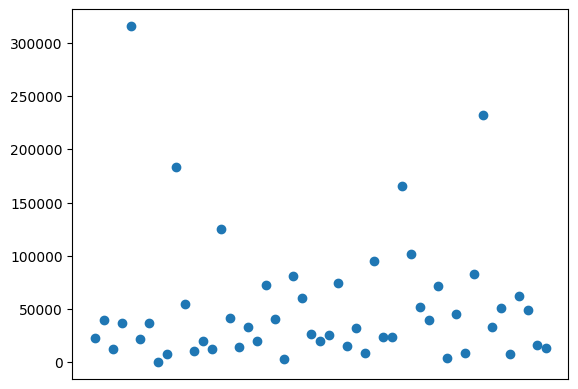

In [54]:
fraud_state_df = train_df[["state", "is_fraud"]].groupby(by = "state", as_index = False).count()
x = fraud_state_df["state"]
y = fraud_state_df["is_fraud"]
plt.plot(x, y, "o")
plt.xticks([])

##### City Level

         is_fraud
count  741.000000
mean    12.715250
std      9.943959
min      0.000000
25%      8.000000
50%     10.000000
75%     13.000000
max    106.000000


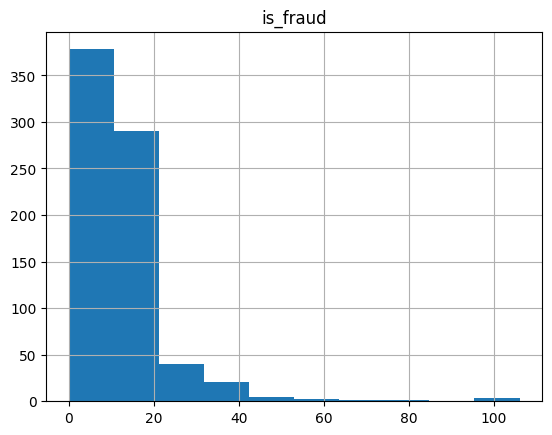

In [55]:
number_customer_region = train_df[["city", "is_fraud"]].groupby(by = "city").sum()
number_customer_region.hist(column = "is_fraud")
print(number_customer_region.describe())

##### Time Series Analysis

/var/folders/fl/982cw_1x42jd0883_dqg16_80000gn/T/ipykernel_14168/378013228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['trans_month'] = time_series_data['trans_date'].apply(lambda x: x[:7])
/var/folders/fl/982cw_1x42jd0883_dqg16_80000gn/T/ipykernel_14168/378013228.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data["trans_date"] = pd.to_datetime(time_series_data["trans_date"], format='%Y-%m-%d')
/var/folders/fl/982cw_1x42jd0883_dqg16_80000gn/T/ipykernel_14168/378013

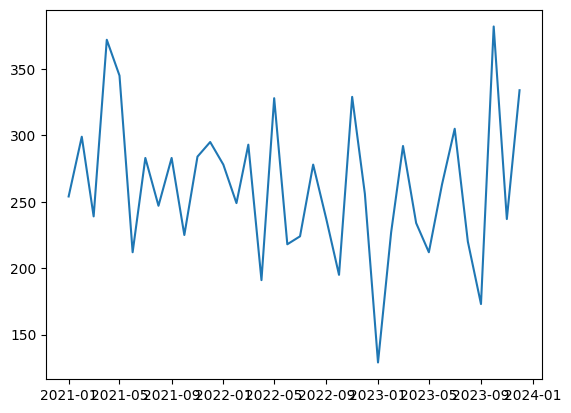

In [56]:
time_series_data = train_df[["trans_date", "amt", "is_fraud"]]
time_series_data['trans_month'] = time_series_data['trans_date'].apply(lambda x: x[:7])
time_series_data["trans_date"] = pd.to_datetime(time_series_data["trans_date"], format='%Y-%m-%d')
time_series_data["trans_month"] = pd.to_datetime(time_series_data["trans_month"], format='%Y-%m')
time_num_frauds = time_series_data[["trans_month", "is_fraud"]].groupby(by = "trans_month", as_index = False).sum()
plt.plot(time_num_frauds["trans_month"], time_num_frauds["is_fraud"])

               is_fraud
trans_quarter          
2021Q1              792
2021Q2              929
2021Q3              813
2021Q4              804
2022Q1              820
2022Q2              737
2022Q3              739
2022Q4              780
2023Q1              648
2023Q2              709
2023Q3              698
2023Q4              953


/var/folders/fl/982cw_1x42jd0883_dqg16_80000gn/T/ipykernel_14168/939674895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data["trans_quarter"] = pd.PeriodIndex(time_series_data['trans_month'], freq='Q')


<Axes: xlabel='trans_quarter'>

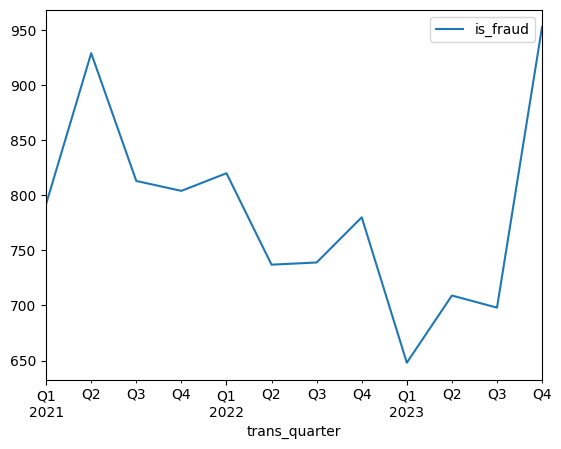

In [57]:
time_series_data["trans_quarter"] = pd.PeriodIndex(time_series_data['trans_month'], freq='Q')
quarter_num_frauds = time_series_data[["trans_quarter", "is_fraud"]].groupby(by = "trans_quarter").sum()
print(quarter_num_frauds)
quarter_num_frauds.plot()
# plt.plot(quarter_num_frauds["trans_quarter"], quarter_num_frauds["is_fraud"])

                       amt
trans_quarter             
2021Q1         13241806.60
2021Q2         17538527.29
2021Q3         18508058.38
2021Q4         20154146.98
2022Q1         10990260.21
2022Q2         14541507.64
2022Q3         15691771.62
2022Q4         17626806.73
2023Q1         10425303.51
2023Q2         14166168.80
2023Q3         15166465.32
2023Q4         17514390.64


<Axes: xlabel='trans_quarter'>

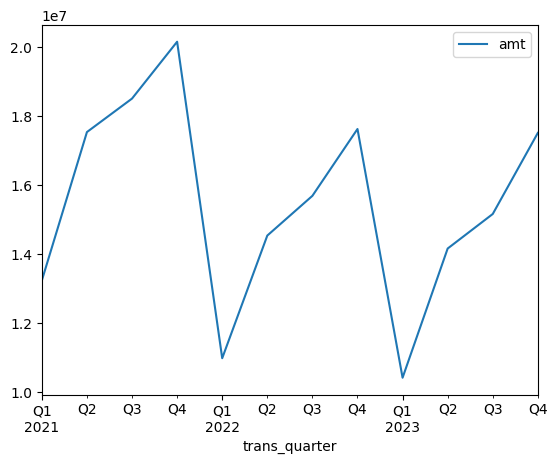

In [58]:
quarter_amt_frauds = time_series_data[["trans_quarter", "amt"]].groupby(by = "trans_quarter").sum()
print(quarter_amt_frauds)
quarter_amt_frauds.plot()

trans_quarter
2021Q1    0.004855
2021Q2    0.004269
2021Q3    0.003505
2021Q4    0.003013
2022Q1    0.005071
2022Q2    0.003388
2022Q3    0.003176
2022Q4    0.002885
2023Q1    0.004010
2023Q2    0.003261
2023Q3    0.002982
2023Q4    0.003506
Freq: Q-DEC, dtype: float64


/var/folders/fl/982cw_1x42jd0883_dqg16_80000gn/T/ipykernel_14168/3091676309.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  quarter_prop_frauds = time_series_data[["trans_quarter", "is_fraud"]].groupby(by = "trans_quarter").apply(lambda x: x["is_fraud"].sum()/len(x))


<Axes: xlabel='trans_quarter'>

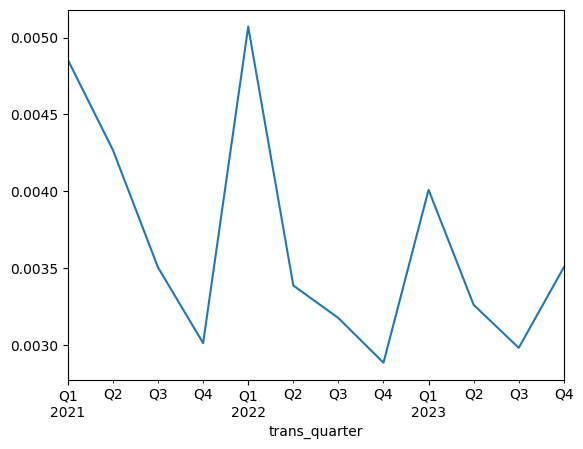

In [59]:
quarter_prop_frauds = time_series_data[["trans_quarter", "is_fraud"]].groupby(by = "trans_quarter").apply(lambda x: x["is_fraud"].sum()/len(x))
print(quarter_prop_frauds)
quarter_prop_frauds.plot()